Dataset (Iris Dataset)

In [27]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris 
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from matplotlib.colors import LinearSegmentedColormap

custom_cmap = LinearSegmentedColormap.from_list(
    "custom_purple",
    ['#D4A5E6', '#FFFFFF', '#A569BD', '#6C3483', '#2E0854'], N=256
)



In [28]:
# Load Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

# Print the dataset information
print("Dataset:")
print(iris_df.head())  
print(iris_df.info()) 
print(iris_df.describe())

# Check for null values
print("\nNull values in the dataset:")
print(iris_df.isnull().sum())

# Check for duplicates
print("\nDuplicate rows in the dataset:")
print(iris_df.duplicated().sum()) 

# Drop duplicate rows
iris_df = iris_df.drop_duplicates()

# Check for duplicates
print("\n check duplicate rows after drop:")
print(iris_df.duplicated().sum()) 


# Features (sepal length, sepal width, petal length, petal width)
X = iris_df.iloc[:, :-1]
# Target (species)
y = iris_df['species']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("\nDataset after standardize:")
print(iris_df.head())  

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("\nShape of Training and Testing Sets:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")


Dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32 

Part 1: K-Nearest Neighbors (KNN)

Results for euclidean:
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



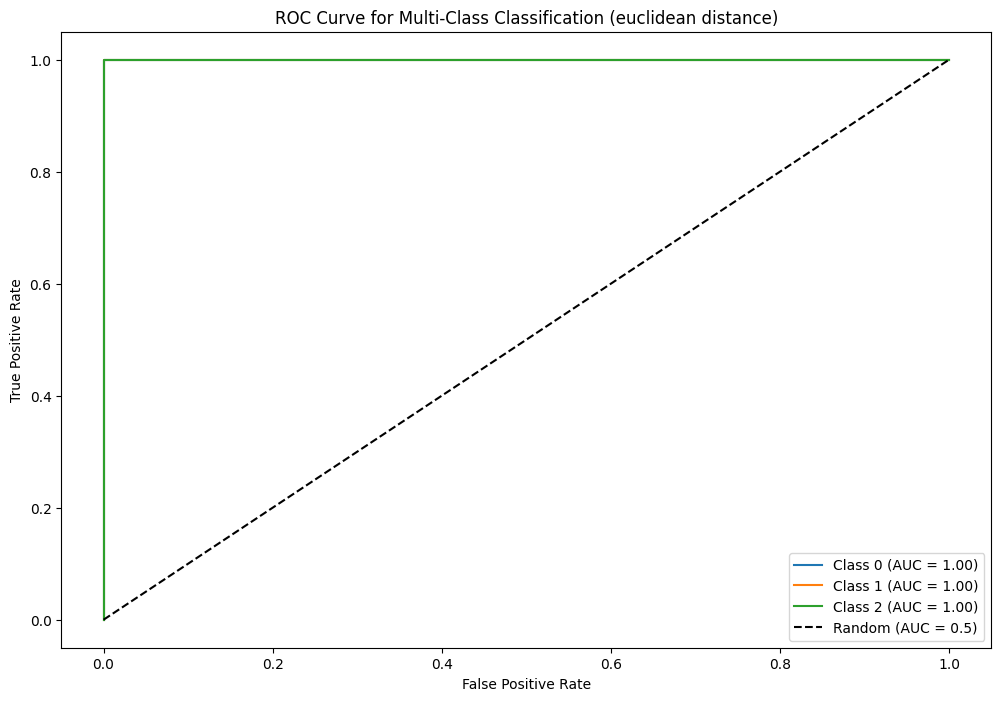

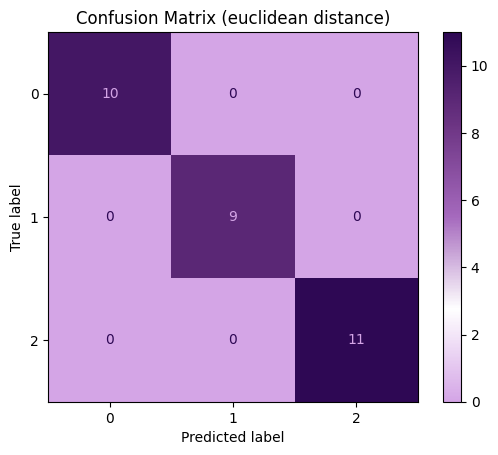

Results for manhattan:
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



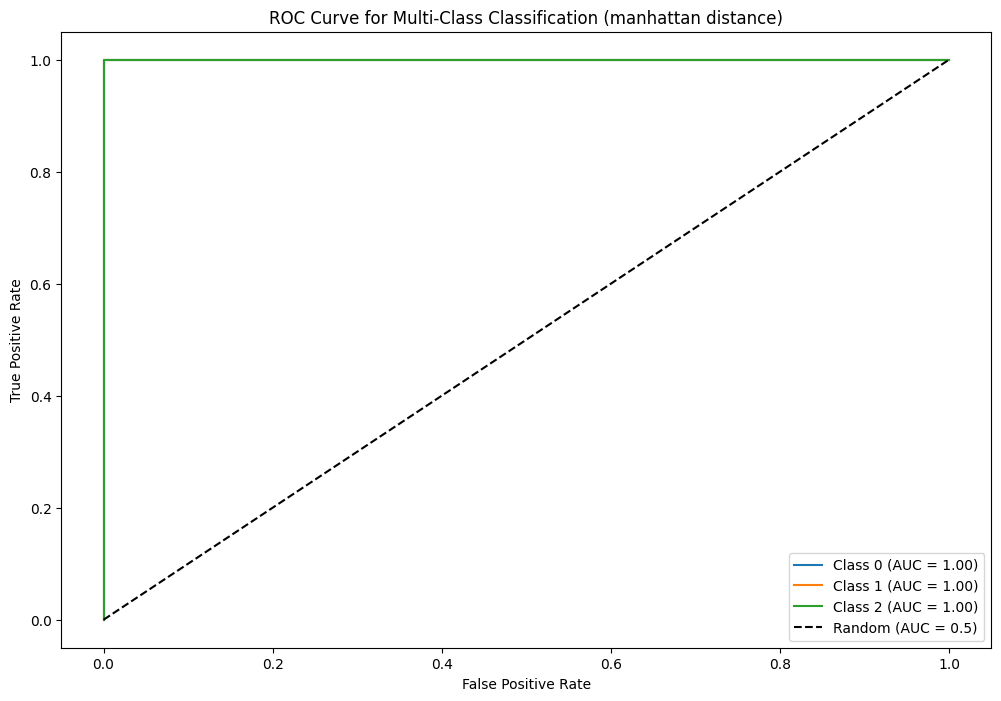

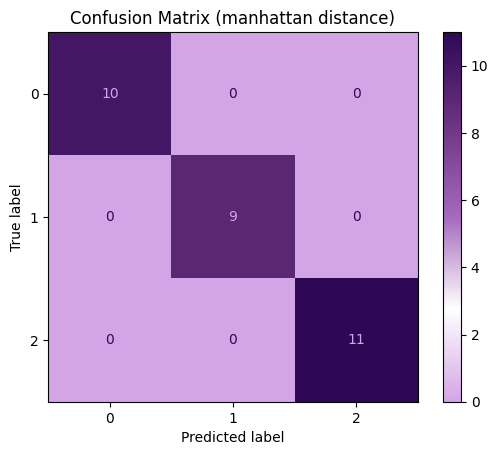

Results for cosine:
Accuracy: 0.8666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.86      0.67      0.75         9
           2       0.77      0.91      0.83        11

    accuracy                           0.87        30
   macro avg       0.88      0.86      0.86        30
weighted avg       0.87      0.87      0.86        30



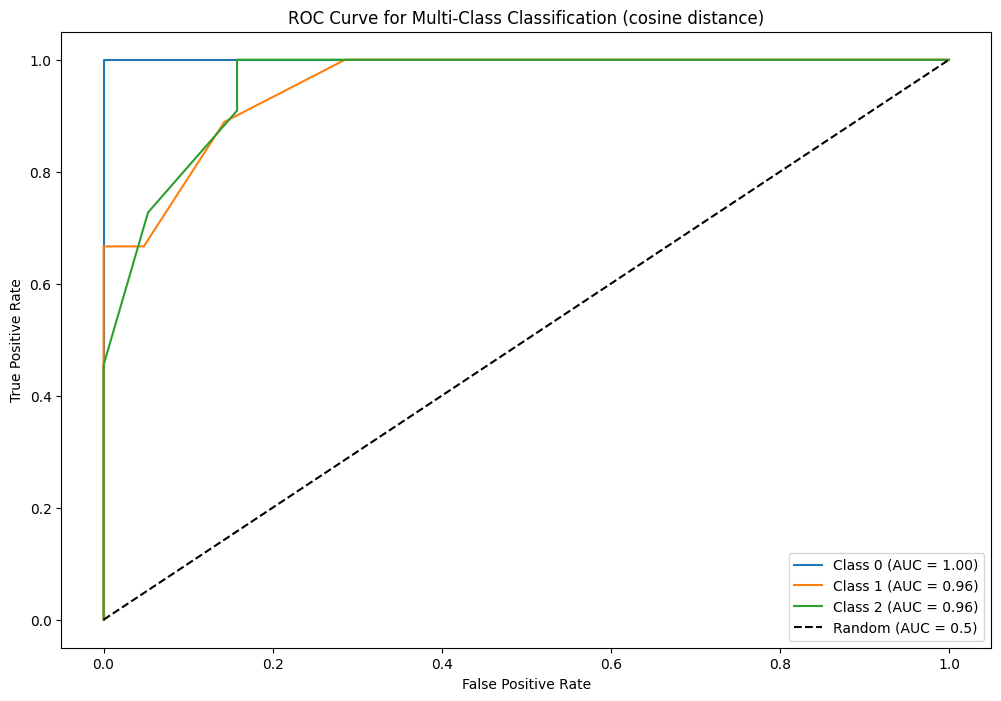

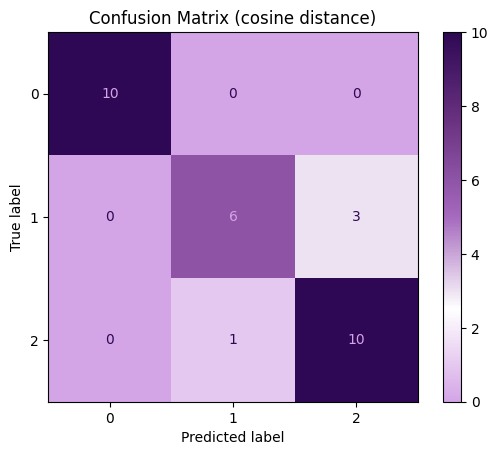

Comparison table to find optimal k for each metric:
           Best k   CV Mean  Accuracy  Precision  Recall  F1-Score  \
euclidean     3.0  0.957971       1.0   1.000000     1.0  1.000000   
manhattan     5.0  0.949638       1.0   1.000000     1.0  1.000000   
cosine        6.0  0.857609       0.9   0.901389     0.9  0.899233   

           Average ROC-AUC  
euclidean         1.000000  
manhattan         1.000000  
cosine            0.973131  


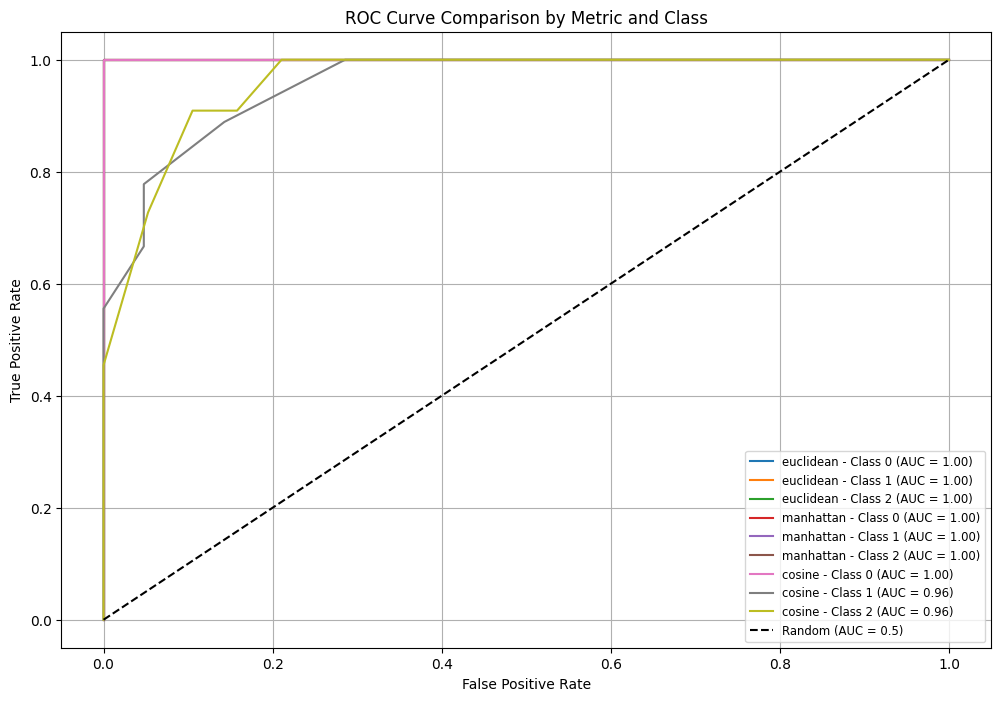

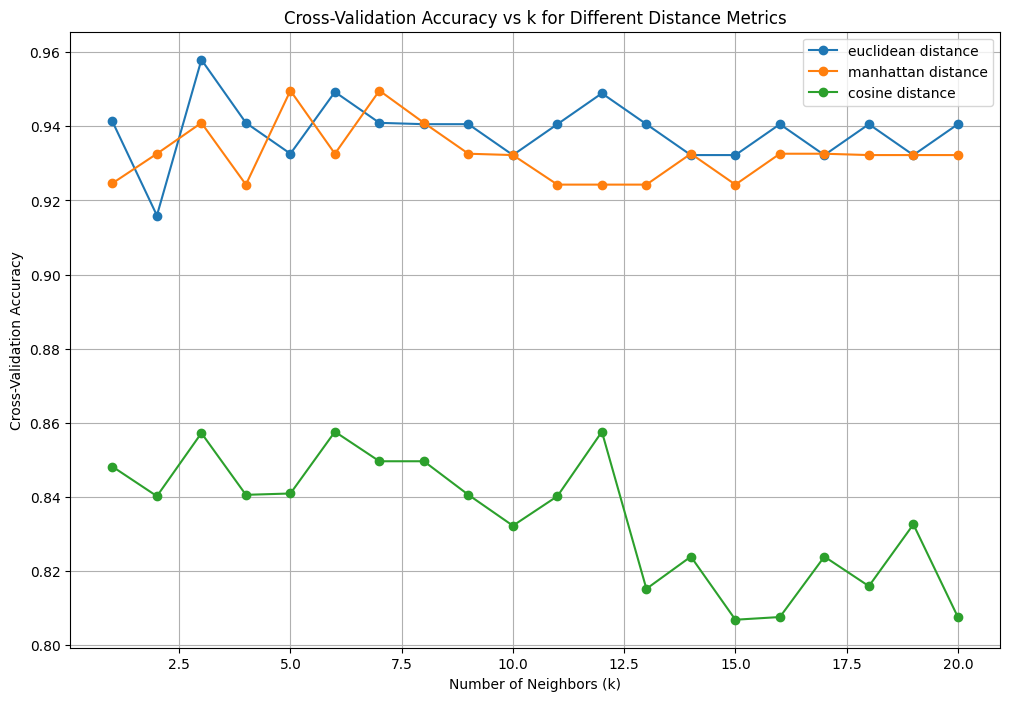


Best Model Results:
Metric: euclidean
Best k: 3
Cross-Validation value: 0.9579710144927537
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


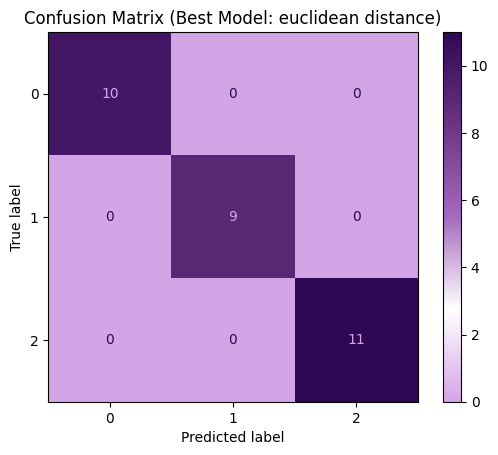

In [29]:
# Define distance metrics
metrics = ['euclidean', 'manhattan', 'cosine']


for metric in metrics:
    knn = KNeighborsClassifier(metric=metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print metrics
    print(f"Results for {metric}:")
    print(f"Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))

    
    # Plot ROC curve for each class
    y_test_bin = label_binarize(y_test, classes=knn.classes_)
    y_pred_prob = knn.predict_proba(X_test)
    plt.figure(figsize=(12, 8))
    for i in range(len(knn.classes_)):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {knn.classes_[i]} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for Multi-Class Classification ({metric} distance)')
    plt.legend(loc='lower right')
    plt.show()

    # Display confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(conf_matrix, display_labels=knn.classes_)
    disp.plot(cmap=custom_cmap, values_format='d')
    plt.title(f'Confusion Matrix ({metric} distance)')
    plt.show()

results = {}
roc_curves = {}

for metric in metrics:
    # Grid Search for optimal k
    param_grid = {'n_neighbors': range(1, 21), 'metric': [metric]}
    grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    best_k = grid_search.best_params_['n_neighbors']
    knn = KNeighborsClassifier(n_neighbors=best_k, metric=metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    y_pred_prob = knn.predict_proba(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Cross-validation for the optimal k
    cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_mean = cv_scores.mean()

    # ROC-AUC calculation
    y_test_bin = label_binarize(y_test, classes=knn.classes_)
    roc_auc_values = []
    for i in range(len(knn.classes_)):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
        roc_auc = auc(fpr, tpr)
        roc_auc_values.append(roc_auc)
        if metric not in roc_curves:
            roc_curves[metric] = []
        roc_curves[metric].append((fpr, tpr, roc_auc))

    avg_roc_auc = np.mean(roc_auc_values)

    # Store results
    results[metric] = {
        'Best k': best_k,
        'CV Mean': cv_mean,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Average ROC-AUC': avg_roc_auc
    }

# Create a comparison table
comparison_table = pd.DataFrame(results).T
print("Comparison table to find optimal k for each metric:")
print(comparison_table)

# Plot ROC curves for all metrics
plt.figure(figsize=(12, 8))
for metric, curves in roc_curves.items():
    for idx, (fpr, tpr, roc_auc) in enumerate(curves):
        plt.plot(fpr, tpr, label=f'{metric} - Class {idx} (AUC = {roc_auc:.2f})')

# Plot threshold line
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison by Metric and Class')
plt.legend(loc='best', fontsize='small')
plt.grid(True)
plt.show()

# Plot cross-validation scores vs k for each metric
plt.figure(figsize=(12, 8))
for metric in metrics:
    # Cross-validation scores for each k
    cv_scores = []
    for k in range(1, 21):
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        cv_scores.append(np.mean(cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')))
    
    plt.plot(range(1, 21), cv_scores, label=f'{metric} distance', marker='o')

plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Cross-Validation Accuracy vs k for Different Distance Metrics')
plt.legend()
plt.grid(True)
plt.show()

# Train and evaluate the best model overall
best_metric = comparison_table['Average ROC-AUC'].idxmax()
best_k = results[best_metric]['Best k']
best_knn = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)
best_knn.fit(X_train, y_train)
y_pred_best = best_knn.predict(X_test)

print("\nBest Model Results:")
print(f"Metric: {best_metric}")
print(f"Best k: {best_k}")
print("Cross-Validation value:", results[best_metric]['CV Mean'])
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_best, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred_best, average='weighted'))

# Display confusion matrix for the best model
conf_matrix = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=best_knn.classes_)
disp.plot(cmap=custom_cmap, values_format='d')
plt.title(f'Confusion Matrix (Best Model: {best_metric} distance)')
plt.show()



Part 2: Logistic Regression

Results for l1 regularization (Before Hyperparameter Tuning):
Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



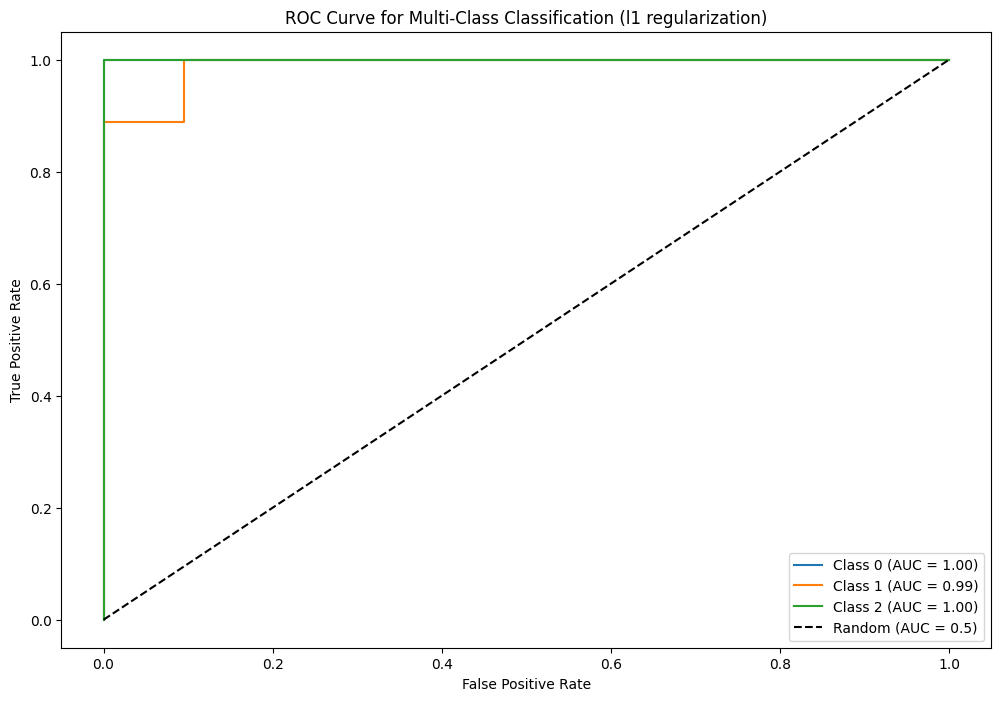

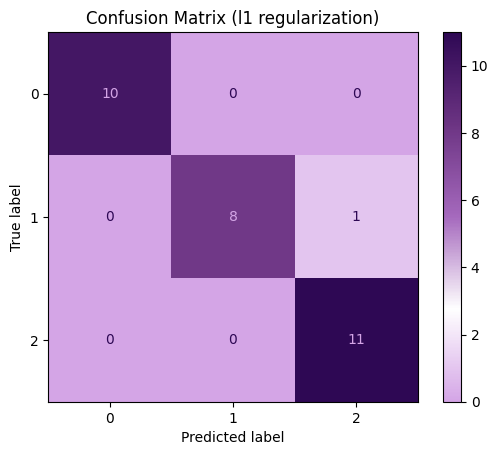

Results for l2 regularization (Before Hyperparameter Tuning):
Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



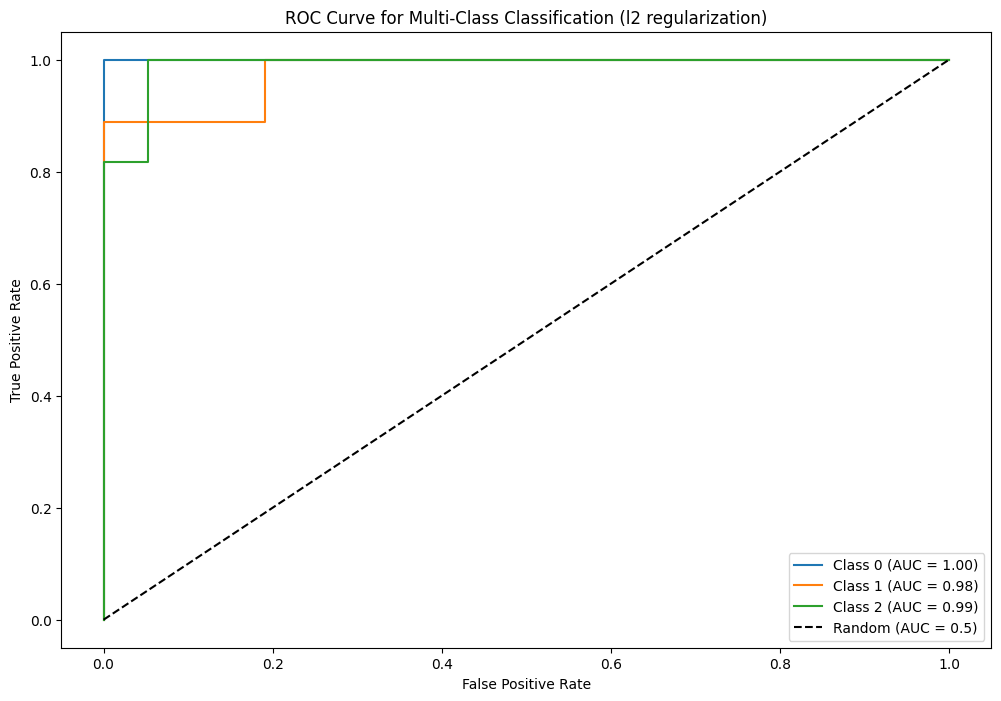

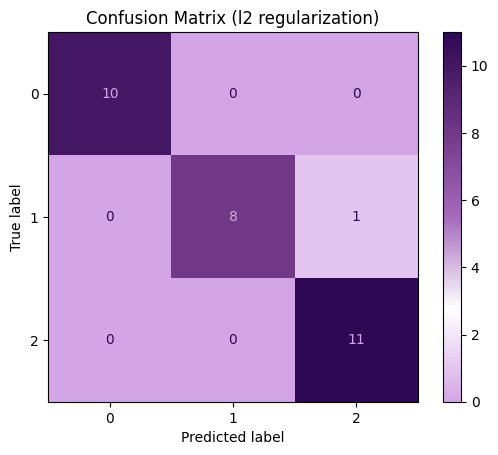


Results for l1 regularization (After Hyperparameter Tuning):
Best C value: 100
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



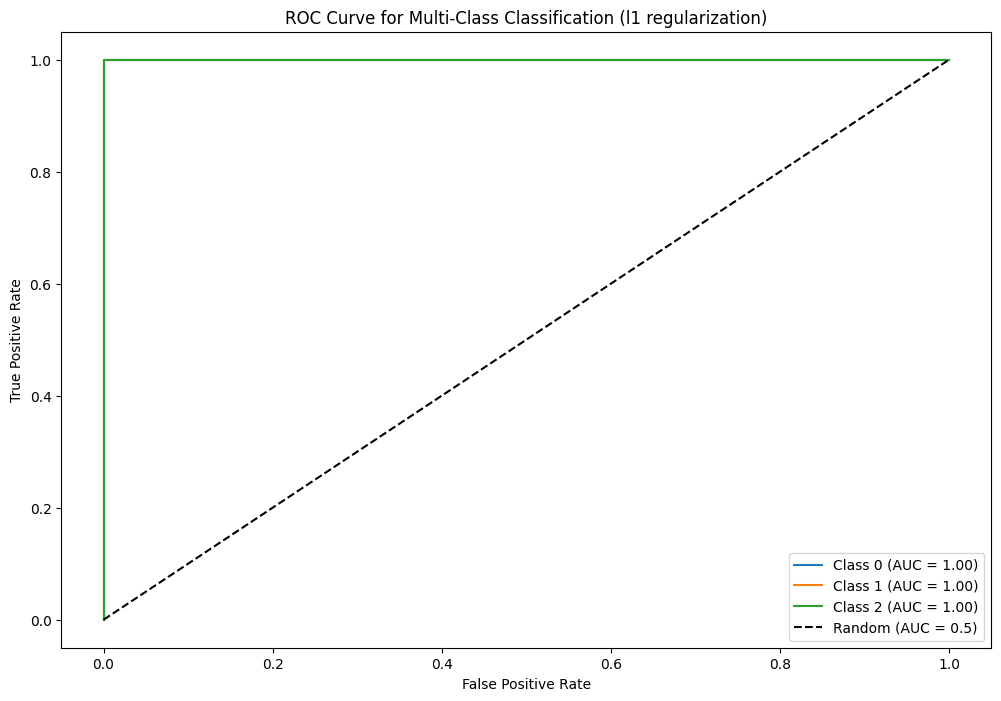

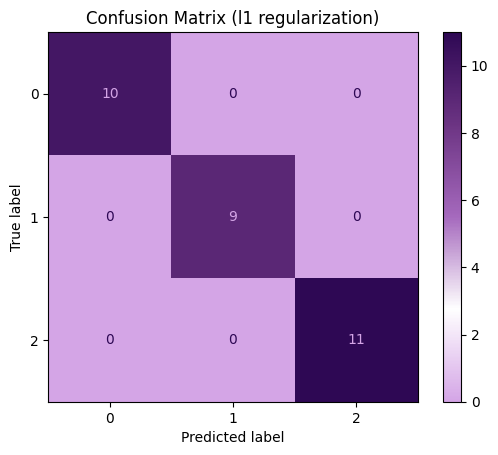


Results for l2 regularization (After Hyperparameter Tuning):
Best C value: 100
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



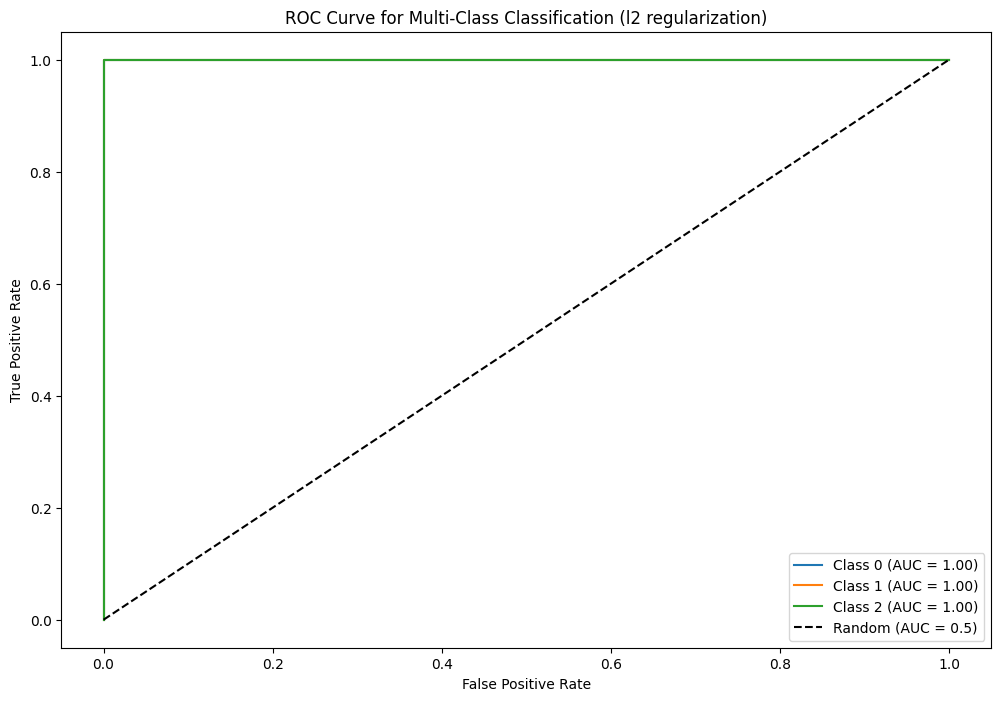

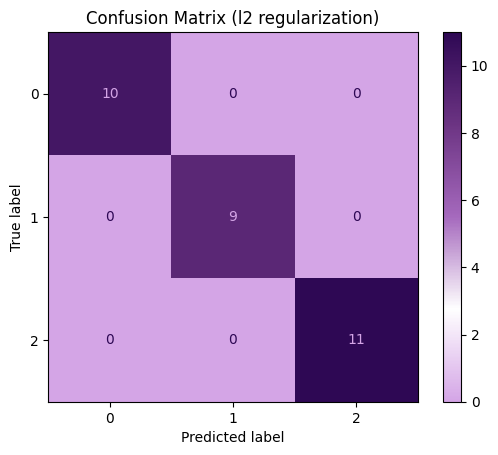

Comparison of all models:
                     Accuracy  Precision    Recall  F1-Score  Average ROC-AUC
euclidean            1.000000   1.000000  1.000000  1.000000         1.000000
manhattan            1.000000   1.000000  1.000000  1.000000         1.000000
cosine               0.900000   0.901389  0.900000  0.899233         0.973131
Logistic (l1)        0.966667   0.969444  0.966667  0.966411         0.996473
Logistic (l2)        0.966667   0.969444  0.966667  0.966411         0.989756
Logistic (l1 tuned)  1.000000   1.000000  1.000000  1.000000         1.000000
Logistic (l2 tuned)  1.000000   1.000000  1.000000  1.000000         1.000000


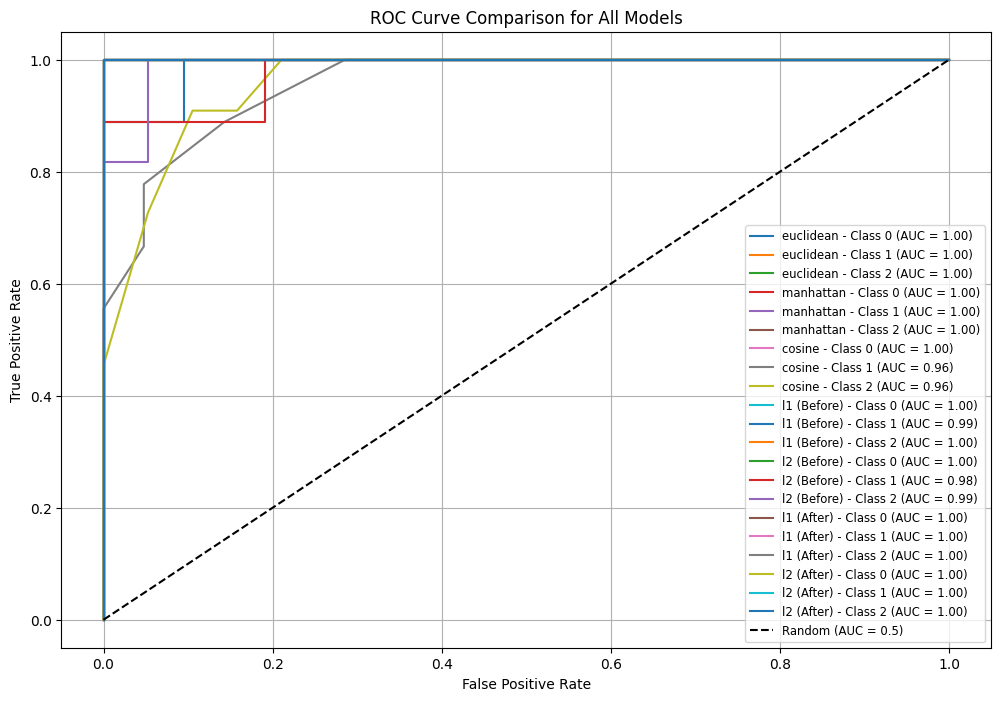

In [30]:
# List of regularization types
regularizations = ['l1', 'l2']

predictions = {}

# Hyperparameter grid for C
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Before tuning
logreg_results_before = {}

for reg_type in regularizations:
    print(f"Results for {reg_type} regularization (Before Hyperparameter Tuning):")
    logreg = OneVsRestClassifier(LogisticRegression(max_iter=1000, solver='liblinear', penalty=reg_type))
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    y_pred_prob = logreg.predict_proba(X_test)

    predictions[reg_type] = y_pred

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")

    # Print metrics before tuning
    print(classification_report(y_test, y_pred))

    # Store metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Calculate ROC-AUC for each class
    y_test_bin = label_binarize(y_test, classes=logreg.classes_)
    roc_auc_list = []
    for i in range(len(logreg.classes_)):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
        roc_auc = auc(fpr, tpr)
        roc_auc_list.append(roc_auc)

    avg_roc_auc = sum(roc_auc_list) / len(roc_auc_list)

    logreg_results_before[reg_type] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Average ROC-AUC': avg_roc_auc
    }

    # Plot ROC curve for each class
    plt.figure(figsize=(12, 8))
    for i in range(len(logreg.classes_)):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {logreg.classes_[i]} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for Multi-Class Classification ({reg_type} regularization)')
    plt.legend(loc='lower right')
    plt.show()

    # Display confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(conf_matrix, display_labels=logreg.classes_)
    disp.plot(cmap=custom_cmap, values_format='d')
    plt.title(f'Confusion Matrix ({reg_type} regularization)')
    plt.show()

# After tuning
logreg_results_after = {}

for reg_type in regularizations:
    print(f"\nResults for {reg_type} regularization (After Hyperparameter Tuning):")

    logreg = LogisticRegression(max_iter=1000, solver='liblinear', penalty=reg_type)

    # Hyperparameter tuning using GridSearchCV
    grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, scoring='accuracy', cv=5)
    grid_search.fit(X_train, y_train)
    
    # Best hyperparameters and model
    best_model = grid_search.best_estimator_
    best_C = grid_search.best_params_['C']
    
    # Predict using the best model
    y_pred = best_model.predict(X_test)
    y_pred_prob = best_model.predict_proba(X_test)

    predictions[f"{reg_type}_tuned"] = y_pred

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Print metrics after tuning
    print(f"Best C value: {best_C}")
    print(f"Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))

    # Store metrics after tuning
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Calculate ROC-AUC for each class after tuning
    y_test_bin = label_binarize(y_test, classes=best_model.classes_)
    roc_auc_list = []
    for i in range(len(best_model.classes_)):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
        roc_auc = auc(fpr, tpr)
        roc_auc_list.append(roc_auc)

    avg_roc_auc = sum(roc_auc_list) / len(roc_auc_list)

    logreg_results_after[reg_type] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Average ROC-AUC': avg_roc_auc 
    }

    # Plot ROC curve for each class
    plt.figure(figsize=(12, 8))
    for i in range(len(best_model.classes_)):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {best_model.classes_[i]} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for Multi-Class Classification ({reg_type} regularization)')
    plt.legend(loc='lower right')
    plt.show()

    # Display confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(conf_matrix, display_labels=best_model.classes_)
    disp.plot(cmap=custom_cmap, values_format='d')
    plt.title(f'Confusion Matrix ({reg_type} regularization)')
    plt.show()

# Make comparisons
all_results = {}

# KNN Results
for metric in metrics:
    all_results[metric] = {
        'Accuracy': results[metric]['Accuracy'],
        'Precision': results[metric]['Precision'],
        'Recall': results[metric]['Recall'],
        'F1-Score': results[metric]['F1-Score'],
        'Average ROC-AUC': results[metric]['Average ROC-AUC']
    }

# Logistic Regression Results (Before Tuning)
for reg_type in regularizations:
    all_results[f'Logistic ({reg_type})'] = logreg_results_before[reg_type]

# Logistic Regression Results (After Tuning)
for reg_type in regularizations:
    all_results[f'Logistic ({reg_type} tuned)'] = logreg_results_after[reg_type]

comparison_df = pd.DataFrame(all_results).T
print("Comparison of all models:")
print(comparison_df)

# Plot ROC curves for all models
plt.figure(figsize=(12, 8))

# KNN Models
for metric, curves in roc_curves.items():
    for idx, (fpr, tpr, roc_auc) in enumerate(curves):
        plt.plot(fpr, tpr, label=f'{metric} - Class {idx} (AUC = {roc_auc:.2f})')

# Logistic Regression Models (Before Tuning)
for reg_type in regularizations:
    logreg = OneVsRestClassifier(LogisticRegression(max_iter=1000, solver='liblinear', penalty=reg_type))
    logreg.fit(X_train, y_train)
    y_pred_prob = logreg.predict_proba(X_test)
    
    y_test_bin = label_binarize(y_test, classes=logreg.classes_)
    for i in range(len(logreg.classes_)):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{reg_type} (Before) - Class {i} (AUC = {roc_auc:.2f})')

# Logistic Regression Models (After Tuning)
for reg_type in regularizations:
    best_model = grid_search.best_estimator_
    y_pred_prob = best_model.predict_proba(X_test)
    
    y_test_bin = label_binarize(y_test, classes=best_model.classes_)
    for i in range(len(best_model.classes_)):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{reg_type} (After) - Class {i} (AUC = {roc_auc:.2f})')

# Plot threshold
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5)')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison for All Models')
plt.legend(loc='best', fontsize='small')
plt.grid(True)
plt.show()


Part 3: Support Vector Machines (SVM)


SVM (Linear Kernel) Classification Report:
Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30




SVM (Polynomial Kernel) Classification Report:
Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      1.00      0.95         9
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30




SVM (RBF Kernel) Classification Report:
Accuracy: 1.0
              precision    re

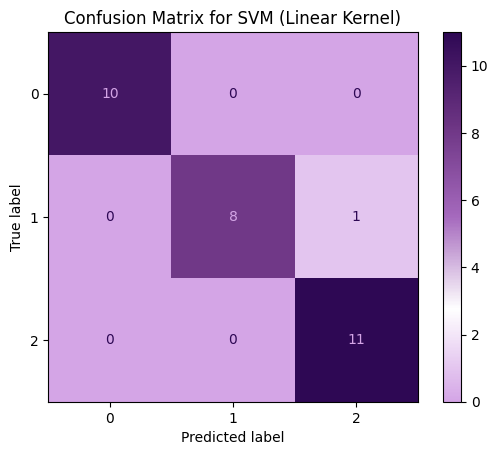

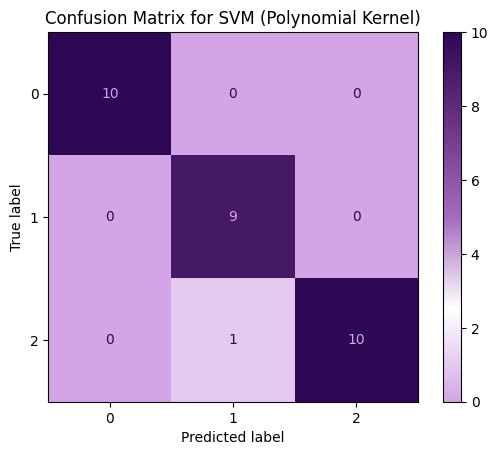

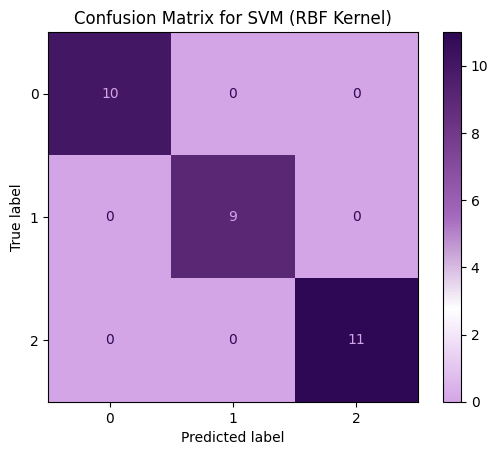

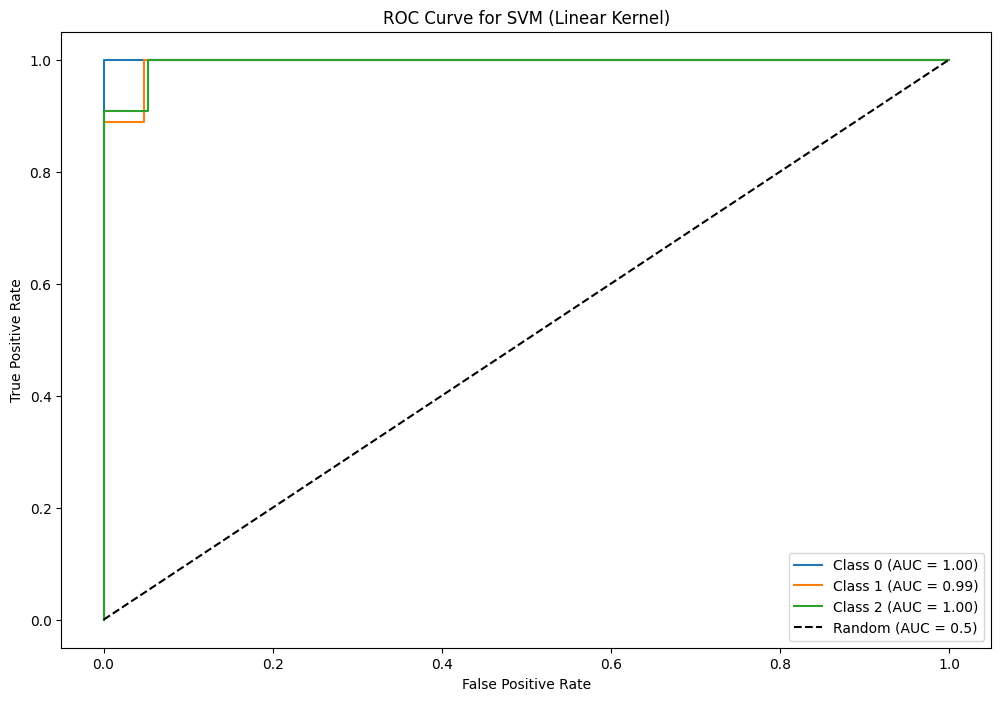

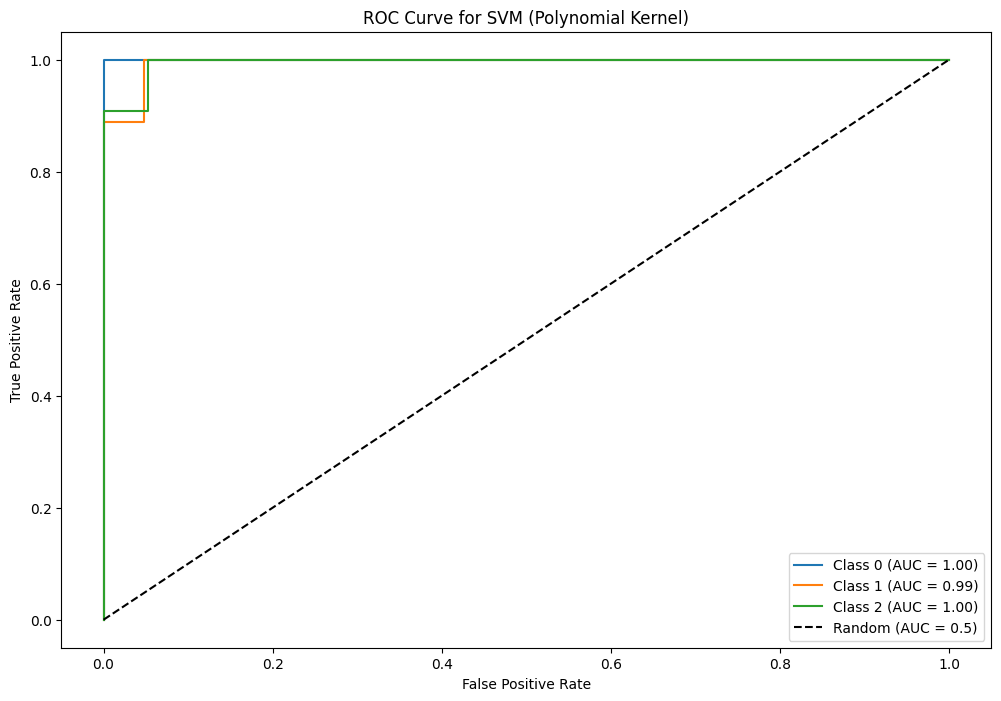

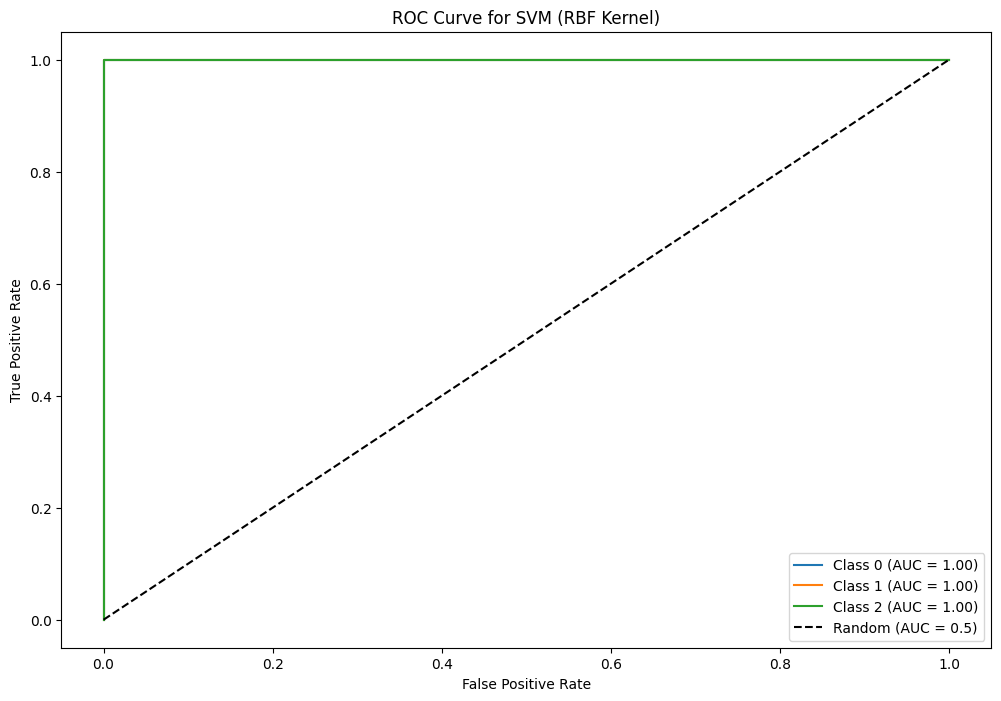

In [31]:
# Function to print evaluation report
def print_evaluation_report(y_test, y_pred, label="Model"):
    print(f"\n{label} Classification Report:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))
    print("\n")

# Function to plot confusion matrix
def plot_confusion_matrix(model, y_test, y_pred, label="Model"):
    conf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(conf_matrix, display_labels=model.classes_)
    disp.plot(cmap=custom_cmap, values_format='d')
    plt.title(f'Confusion Matrix for {label}')
    plt.show()

# Function to plot ROC curve
def plot_roc_curve(y_test, y_pred_prob, label="Model"):
    plt.figure(figsize=(12, 8))
    for i in range(len(np.unique(y_test))):
        fpr, tpr, _ = roc_curve(y_test == i, y_pred_prob[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {label}')
    plt.legend(loc='lower right')
    plt.show()

# SVM with Linear Kernel
svm_linear = SVC(kernel='linear', probability=True)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
y_pred_prob_linear = svm_linear.predict_proba(X_test)

# SVM with Polynomial Kernel
svm_poly = SVC(kernel='poly', degree=3, probability=True) 
svm_poly.fit(X_train, y_train)
y_pred_poly = svm_poly.predict(X_test)
y_pred_prob_poly = svm_poly.predict_proba(X_test)

# SVM with RBF Kernel
svm_rbf = SVC(kernel='rbf', probability=True)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
y_pred_prob_rbf = svm_rbf.predict_proba(X_test)

# Print classification reports for each model
print_evaluation_report(y_test, y_pred_linear, label="SVM (Linear Kernel)")
print_evaluation_report(y_test, y_pred_poly, label="SVM (Polynomial Kernel)")
print_evaluation_report(y_test, y_pred_rbf, label="SVM (RBF Kernel)")

comparison_results = {}

# SVM with Linear Kernel
accuracy_linear = accuracy_score(y_test, y_pred_linear)
report_linear = classification_report(y_test, y_pred_linear, output_dict=True)
roc_auc_linear = roc_auc_score(y_test, y_pred_prob_linear, multi_class='ovr')

# SVM with Polynomial Kernel
accuracy_poly = accuracy_score(y_test, y_pred_poly)
report_poly = classification_report(y_test, y_pred_poly, output_dict=True)
roc_auc_poly = roc_auc_score(y_test, y_pred_prob_poly, multi_class='ovr')

# SVM with RBF Kernel
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
report_rbf = classification_report(y_test, y_pred_rbf, output_dict=True)
roc_auc_rbf = roc_auc_score(y_test, y_pred_prob_rbf, multi_class='ovr')

comparison_results['Linear Kernel'] = {
    'Accuracy': accuracy_linear,
    'Precision (Macro)': report_linear['macro avg']['precision'],
    'Recall (Macro)': report_linear['macro avg']['recall'],
    'F1-Score (Macro)': report_linear['macro avg']['f1-score'],
    'ROC-AUC': roc_auc_linear
}
comparison_results['Polynomial Kernel'] = {
    'Accuracy': accuracy_poly,
    'Precision (Macro)': report_poly['macro avg']['precision'],
    'Recall (Macro)': report_poly['macro avg']['recall'],
    'F1-Score (Macro)': report_poly['macro avg']['f1-score'],
    'ROC-AUC': roc_auc_poly
}
comparison_results['RBF Kernel'] = {
    'Accuracy': accuracy_rbf,
    'Precision (Macro)': report_rbf['macro avg']['precision'],
    'Recall (Macro)': report_rbf['macro avg']['recall'],
    'F1-Score (Macro)': report_rbf['macro avg']['f1-score'],
    'ROC-AUC': roc_auc_rbf
}

# Dislay comparison table
comparison_df = pd.DataFrame(comparison_results).T
print(comparison_df)

# Plot confusion matrix for each SVM model
plot_confusion_matrix(svm_linear, y_test, y_pred_linear, "SVM (Linear Kernel)")
plot_confusion_matrix(svm_poly, y_test, y_pred_poly, "SVM (Polynomial Kernel)")
plot_confusion_matrix(svm_rbf, y_test, y_pred_rbf, "SVM (RBF Kernel)")

plot_roc_curve(y_test, y_pred_prob_linear, "SVM (Linear Kernel)")
plot_roc_curve(y_test, y_pred_prob_poly, "SVM (Polynomial Kernel)")
plot_roc_curve(y_test, y_pred_prob_rbf, "SVM (RBF Kernel)")



Part 4: Ensemble Methods

AdaBoost Accuracy: 0.9333333333333333
AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.89      0.89      0.89         9
           2       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

Bagging Accuracy: 1.0
Bagging Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Random Forest Accuracy: 1.0
Random Forest Classification Report:
              precision    recall  f1-score   supp

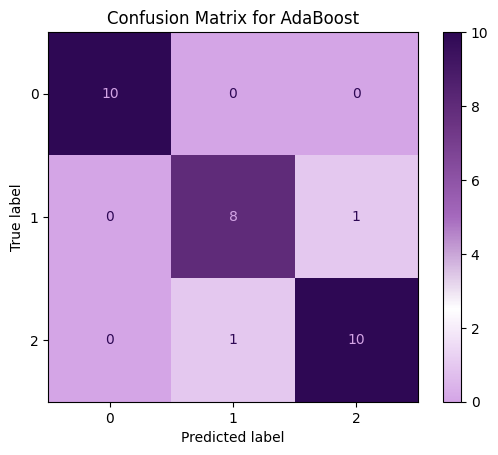

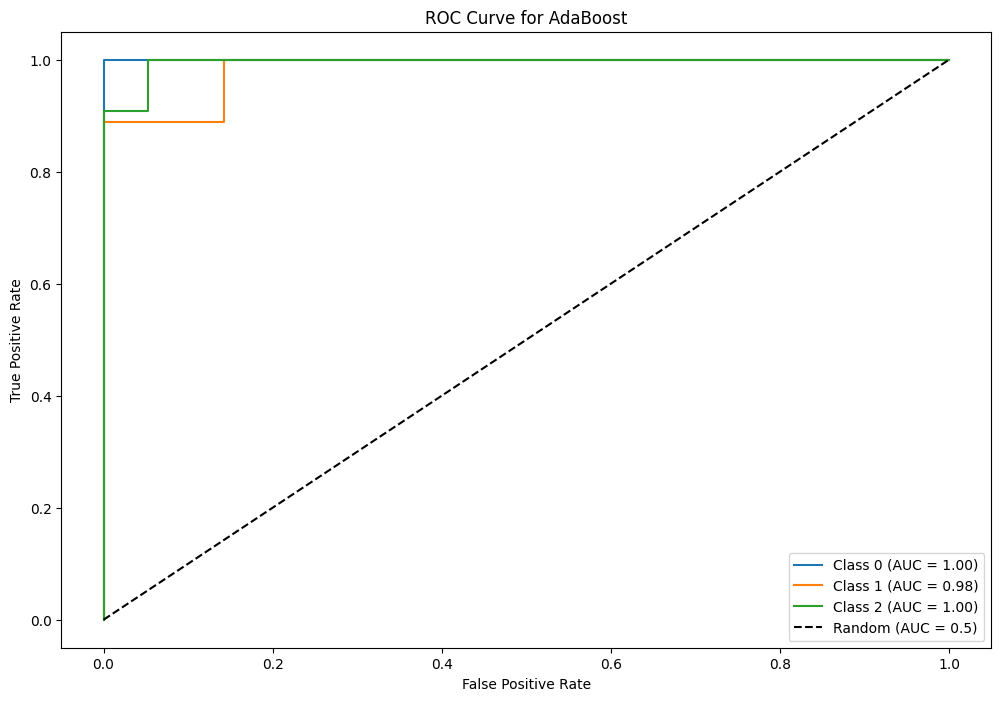

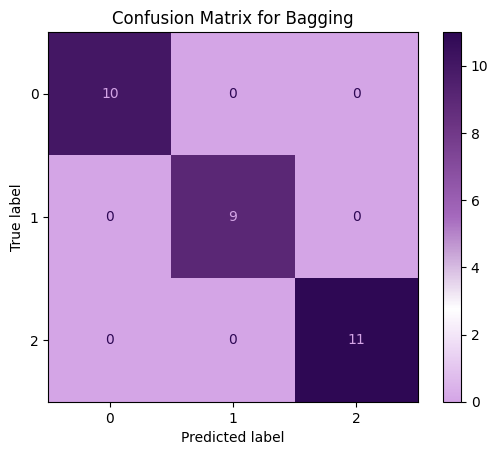

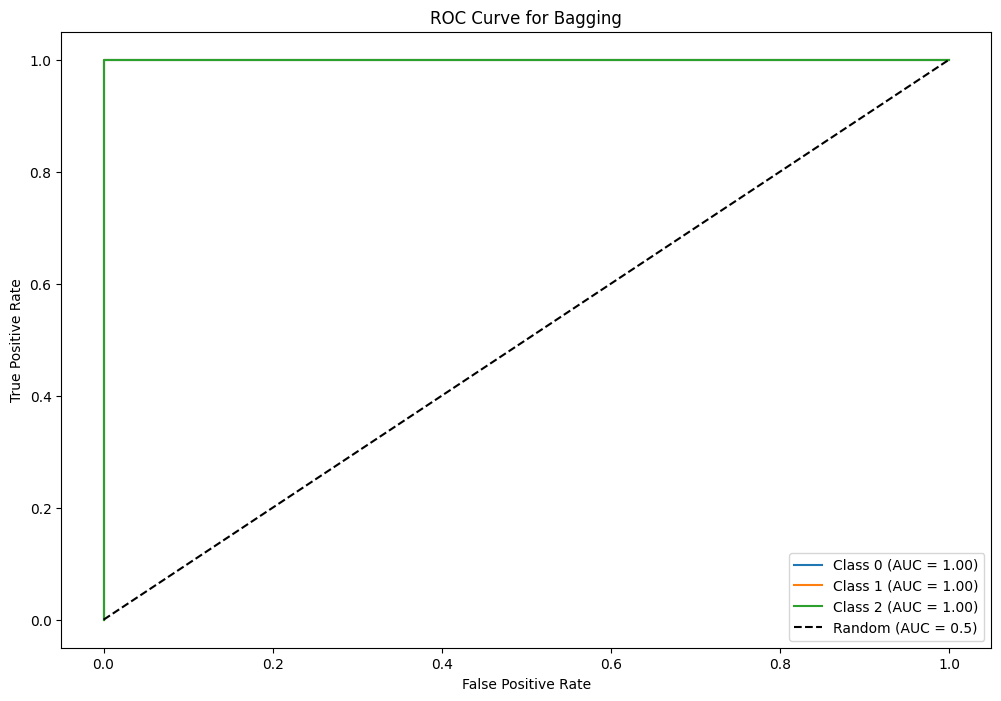

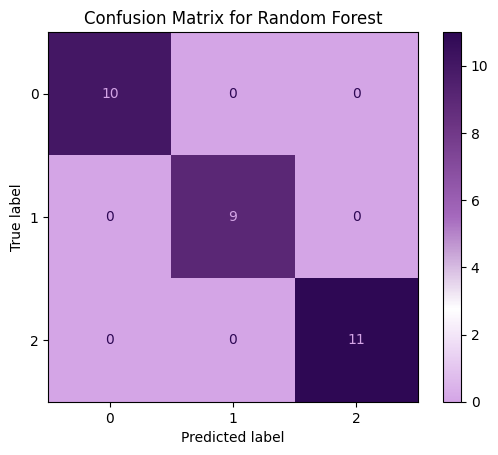

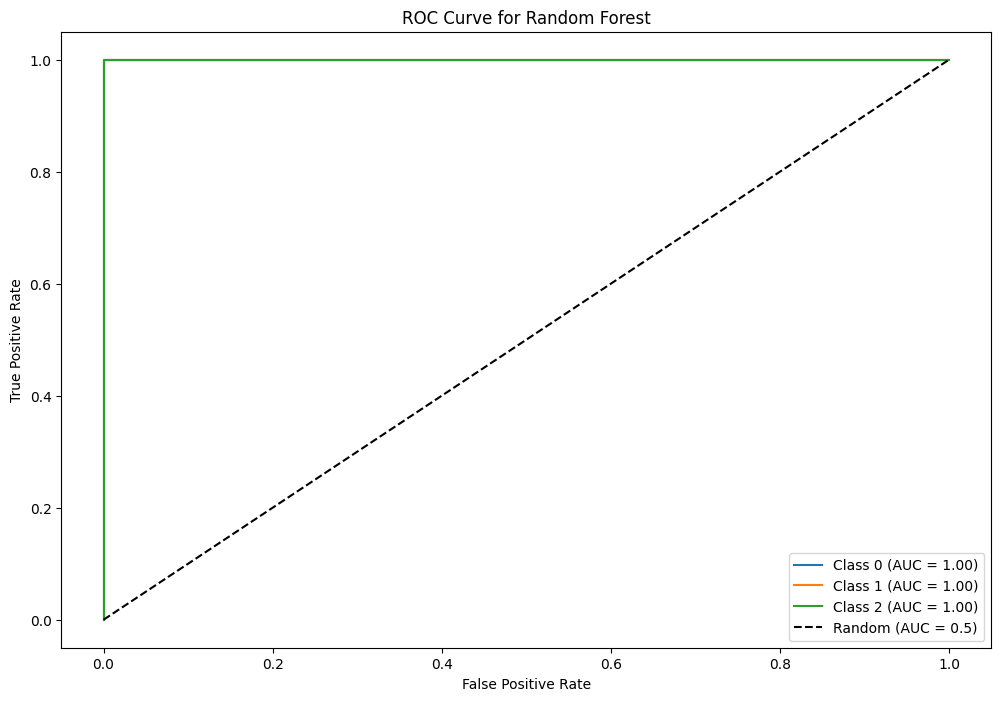

In [32]:
# Train and evaluate the AdaBoost model
adaboost_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    algorithm='SAMME',
    random_state=42
)
adaboost_model.fit(X_train, y_train)
y_pred_adaboost = adaboost_model.predict(X_test)
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print(f"AdaBoost Accuracy: {accuracy_adaboost}")
# Print classification report for AdaBoost
print("AdaBoost Classification Report:")
print(classification_report(y_test, y_pred_adaboost))
roc_auc_adaboost = roc_auc_score(y_test, adaboost_model.predict_proba(X_test), multi_class='ovr')

# Train and evaluate the Bagging model
bagging_model = BaggingClassifier(n_estimators=50, random_state=42)
bagging_model.fit(X_train, y_train)
y_pred_bagging = bagging_model.predict(X_test)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print(f"Bagging Accuracy: {accuracy_bagging}")
# Print classification report for Bagging
print("Bagging Classification Report:")
print(classification_report(y_test, y_pred_bagging))
roc_auc_bagging = roc_auc_score(y_test, bagging_model.predict_proba(X_test), multi_class='ovr')

# Train and evaluate the Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=50, random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")
# Print classification report for Random Forest
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
roc_auc_rf = roc_auc_score(y_test, random_forest_model.predict_proba(X_test), multi_class='ovr')

report_adaboost = classification_report(y_test, y_pred_adaboost, output_dict=True)
report_bagging = classification_report(y_test, y_pred_bagging, output_dict=True)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)

# Compare the evaluation metrics
comparison_table = pd.DataFrame({
    'Evaluation Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC'],
    'AdaBoost': [
        accuracy_adaboost,
        report_adaboost['weighted avg']['precision'],
        report_adaboost['weighted avg']['recall'],
        report_adaboost['weighted avg']['f1-score'],
        roc_auc_adaboost
    ],
    'Bagging': [
        accuracy_bagging,
        report_bagging['weighted avg']['precision'],
        report_bagging['weighted avg']['recall'],
        report_bagging['weighted avg']['f1-score'],
        roc_auc_bagging
    ],
    'Random Forest': [
        accuracy_rf,
        report_rf['weighted avg']['precision'],
        report_rf['weighted avg']['recall'],
        report_rf['weighted avg']['f1-score'],
        roc_auc_rf
    ]
})

# Display the comparison table
print("\nModel Comparison Table:")
print(comparison_table)

# Plot the confusion matrix and ROC curve for AdaBoost model
plot_confusion_matrix(adaboost_model, y_test, y_pred_adaboost, "AdaBoost")
plot_roc_curve(y_test, adaboost_model.predict_proba(X_test), "AdaBoost")

# Plot the confusion matrix and ROC curve for Bagging model
plot_confusion_matrix(bagging_model, y_test, y_pred_bagging, "Bagging")
plot_roc_curve(y_test, bagging_model.predict_proba(X_test), "Bagging")

# Plot the confusion matrix and ROC curve for Random Forest model
plot_confusion_matrix(random_forest_model, y_test, y_pred_rf, "Random Forest")
plot_roc_curve(y_test, random_forest_model.predict_proba(X_test), "Random Forest")
